# Austin Wayling

## Research question/interests

I have always loved following sports and stats and my favorite is baseball. The movie Moneyball introduced me to the idea of a team using data analysis to compete despite having a substantially smaller budget. Since then players have approached the game through a different lense causing the way the game is played to change. I am interested in looking into trends throughout the 150 year history of baseball and if the current declining offense is a cause for concern or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.__version__

In [ ]:
batting = pd.read_csv("../data/raw/Batting.csv")

In [ ]:
people = pd.read_csv("../data/raw/People.csv")

In [ ]:
pitching = pd.read_csv("../data/raw/Pitching.csv")

In [ ]:
salaries = pd.read_csv("../data/raw/Salaries.csv")

In [ ]:
fielding = pd.read_csv("../data/raw/Fielding.csv")

# Milestone 3

## Task 1 EDA

In [ ]:
batting.shape

In [ ]:
people.shape

In [ ]:
pitching.shape

In [ ]:
fielding.shape

In [ ]:
people.describe()

In [ ]:
batting.describe()

In [ ]:
pitching.describe()

In [ ]:
salaries.describe()

In [ ]:
fielding.describe()

In [ ]:
batting.columns

In [ ]:
salaries.columns

In [ ]:
pitching.columns

In [ ]:
fielding.columns

In [ ]:
people.columns

In [ ]:
sns.set_theme(style="ticks",
              font_scale=1.3, 
             )
sns.displot(batting["AB"], kde = True, bins = 15)
#Lot's of unqualafied players who only had a few AB's

In [ ]:
salaries.isnull().describe()

In [ ]:
#Salaries start in 1985 and ends in 2016
batting_edit = batting.drop(batting[batting["yearID"] < 1985].index | batting[batting["yearID"] >2016].index)

In [ ]:
batting_edit["PA"] = batting_edit["AB"] + batting_edit["BB"] + batting_edit["HBP"] + batting_edit["SH"] + batting_edit["SF"]

In [ ]:
batgroup = batting_edit.groupby(["playerID", "yearID"])
batgroup.head()

In [ ]:
salgroup = salaries.groupby(["playerID", "yearID"])
salgroup.agg(np.size)[salgroup.agg(np.size)["teamID"] > 1]

In [ ]:
salaries.shape

In [ ]:
batting = batting.fillna(0)
#Values from pre 1911 and othr early seasons
#Likely very little change from an accurate value

In [ ]:
batting["PA"] = batting["AB"] + batting["BB"] + batting["HBP"] + batting["SH"] + batting["SF"]

In [ ]:
bat_total = batting.groupby("playerID").sum()

In [ ]:
batting["PA"].describe()

In [ ]:
bat_total["G"].describe()

In [ ]:
bat_total["debut"] = batting.groupby("playerID")["yearID"].min()
bat_total["seasons"] = 1 + batting.groupby("playerID")["yearID"].max() - batting.groupby("playerID")["yearID"].min()

In [ ]:
#A qualafied hitter must have 3.1 PA's per team game played. I have determined team games played based on the length of their debut season.
bat_total = bat_total.drop(bat_total[(bat_total["PA"] / (70 * bat_total["seasons"])) < 3.1].index & bat_total[bat_total["debut"] < 1884].index)
bat_total = bat_total.drop(bat_total[(bat_total["PA"] / (112 * bat_total["seasons"])) < 3.1].index & bat_total[(bat_total["debut"] < 1890) & (bat_total["debut"] >= 1884)].index)
bat_total = bat_total.drop(bat_total[(bat_total["PA"] / (132 * bat_total["seasons"])) < 3.1].index & bat_total[(bat_total["debut"] < 1903) & (bat_total["debut"] >= 1890)].index)    
bat_total = bat_total.drop(bat_total[(bat_total["PA"] / (154 * bat_total["seasons"])) < 3.1].index & bat_total[(bat_total["debut"] < 1961) & (bat_total["debut"] >= 1903)].index)  
bat_total = bat_total.drop(bat_total[(bat_total["PA"] / (162 * bat_total["seasons"])) < 3.1].index & bat_total[bat_total["debut"] >= 1961].index)                     

In [ ]:
bat_total.describe()  

In [ ]:
bat_total = bat_total.drop(["yearID", "stint"], axis = 1)

In [ ]:
bat_total.describe()

In [ ]:
bat_total.shape

In [ ]:
sns.scatterplot(data = bat_total, x = "debut", y = "SO")
#Notice how K's increase over time as modern players are less concerned with strikeouts than before and games increased

In [ ]:
bat_total.columns

In [ ]:
bat_total["BA"] = bat_total["H"] / bat_total["AB"]
bat_total["OBP"] = (bat_total["H"] + bat_total["BB"] + bat_total["HBP"])/bat_total["PA"]
bat_total["SLG"] = ((bat_total["H"] - bat_total["2B"] - bat_total["3B"] - bat_total["HR"]) + (2 * bat_total["2B"]) + (3 * bat_total["3B"]) + (4 * bat_total["HR"]))
bat_total["OPS"] = bat_total["OBP"] + bat_total["SLG"]
#Rate stats> OPS is considered to be the best for evaluating perfomance, however advanced stats like OPS+ or wRC+ can be a better measure.

In [ ]:
bat_tot2 = bat_total.drop(["IBB", "HBP", "SH", "SF", "GIDP", "seasons", "AB"], axis = 1)

In [ ]:
batcorr = bat_total.corr()

In [ ]:
sns.scatterplot(data = bat_total, x = "SB", y = "CS")

In [ ]:
bat_year = batting.groupby("yearID").sum()

In [ ]:
bat_year["BA"] = bat_year["H"] / bat_year["AB"]
bat_year["OBP"] = (bat_year["H"] + bat_year["BB"] + bat_year["HBP"])/bat_year["PA"]
bat_year["SLG"] = ((bat_year["H"] - bat_year["2B"] - bat_year["3B"] - bat_year["HR"]) + (2 * bat_year["2B"]) + (3 * bat_year["3B"]) + (4 * bat_year["HR"])) / bat_year["AB"]
bat_year["OPS"] = bat_year["OBP"] + bat_year["SLG"]
bat_year.describe()

In [ ]:
sns.scatterplot(data = bat_year, x = bat_year.index, y = "BA")
#Note drop after 1900, decline from mid 20's to 70's and decline since 2000.

In [ ]:
pitch_year = pitching.groupby("yearID").sum()
pitch_year.describe()

In [ ]:
pitch_year.columns

In [ ]:
pitch_year = pitch_year.drop(["stint", "BK", "GF", "SH", "SF", "GIDP"], axis = 1)

In [ ]:
bat_year[:4]

In [ ]:
pitch_year[:4]

In [ ]:
pitch_year.drop(["BAOpp", "ERA"], axis = 1)

In [ ]:
era = (9 * pitch_year["ER"]) / (pitch_year["IPouts"] / 3)
era


In [ ]:
pitch_year["ERA"] = era

In [ ]:
sns.scatterplot(data = pitch_year, x = pitch_year.index, y = "ERA")
#ERA seems in sync with BA however it is not still in decline (rise of stats like OBP may be the cause?)

In [ ]:
sns.scatterplot(data = pitch_year, x = pitch_year.index, y = "CG")
#Complete games decreasing as pitcher usage changes

After exploring the data more I am interested in the trends throughout the history of baseball. The swings between offense and defense over the years is interesting and a current hot topic in baseball. The start of the 2021 season was compared to the deadball era due to historic offensive lows but the trends appear closer to other era's throughout baseball. I want to see if the reactions to declining offense in baseball is truly a cause for concern, or if the media is overexaggerating the problem.

## Task 2/3 Analysis Pipeline and Method Chaining

In [ ]:
batting_clean = (
                pd.read_csv("../data/raw/Batting.csv")
                .fillna(0)
                .assign(
                    PA = lambda x: x["AB"] + x["BB"] + x["HBP"] + x["SH"] + x["SF"]
                )
)

In [ ]:
bat_clean_year = (
                batting_clean.groupby("yearID").sum()
                .drop(["stint", "SH", "SF", "G"], axis = 1)
                .assign(
                    BA = lambda x: x['H'] / x['AB'],
                    OBP = lambda x: (x['H'] + x['BB'] + x['HBP']) / x['PA'],
                    SLG = lambda x: ((x['H'] - x['2B'] - x['3B'] - x['HR']) + 2 * x['2B'] + 3 * x['3B'] + 4 * x['HR']) / x['AB'],
                    OPS = lambda x: x['OBP'] + x["SLG"]
                )
)

In [ ]:
def batting_load_and_process(file_path):
    batting_clean = (
                pd.read_csv(file_path)
                .fillna(0)
                .assign(
                    PA = lambda x: x["AB"] + x["BB"] + x["HBP"] + x["SH"] + x["SF"]
                )
        )
    bat_clean_year = (
                batting_clean.groupby("yearID").sum()
                .drop(["stint", "SH", "SF", "G"], axis = 1)
                .assign(
                    BA = lambda x: x['H'] / x['AB'],
                    OBP = lambda x: (x['H'] + x['BB'] + x['HBP']) / x['PA'],
                    SLG = lambda x: ((x['H'] - x['2B'] - x['3B'] - x['HR']) + 2 * x['2B'] + 3 * x['3B'] + 4 * x['HR']) / x['AB'],
                    OPS = lambda x: x['OBP'] + x["SLG"],
                    decade = lambda x: (x.index//10)*10
                )
        )
    return bat_clean_year

In [ ]:
batting_load_and_process('../data/raw/Batting.csv')

In [ ]:
pitching_clean = (
                pd.read_csv('../data/raw/Pitching.csv')
                .fillna(0)
)

In [ ]:
pitch_clean_year = (
            pitching_clean.groupby('yearID').sum()
            .drop(["stint", "BK", "GF", "SH", "SF", "GIDP", "BAOpp", "ERA", "W", "L", "G", "GS", "BFP"], axis = 1)
            .assign(
                ERA = lambda x: (9 * x['ER']) / (x['IPouts'] / 3)
            )
)

In [ ]:
def pitching_load_and_process(file_path):
    pitching_clean = (
                pd.read_csv('../data/raw/Pitching.csv')
                .fillna(0)
        )
    pitch_clean_year = (
            pitching_clean.groupby('yearID').sum()
            .drop(["stint", "BK", "GF", "SH", "SF", "GIDP", "BAOpp", "ERA", "W", "L", "G", "GS", "BFP"], axis = 1)
            .assign(
                ERA = lambda x: (9 * x['ER']) / (x['IPouts'] / 3),
                KPG = lambda x: 9 * x['SO']/(x['IPouts']/3),
                BBPG = lambda x: 9 * x['BB']/(x['IPouts']/3)
            )
        )
    return pitch_clean_year

In [ ]:
pitching_load_and_process('../data/raw/Pitching.csv')

In [ ]:
diff_cols = pitch_clean_year.columns.difference(bat_clean_year.columns)
data_clean = pd.merge(bat_clean_year, pitch_clean_year[diff_cols], on = ['yearID'])

In [ ]:
def merge_batting_pitching(bat, pitch):
    diff_cols = pitch.columns.difference(bat.columns)
    data_clean = (
        pd.merge(bat, pitch[diff_cols], on = ['yearID'])
        .assign(
            BABIP = lambda x: (x['H'] - x['HR']) / (x['AB']-x['SO']-x['HR']) 
        )
        .reset_index()
    )
    return data_clean

In [ ]:
df1 = batting_load_and_process('../data/raw/Batting.csv')
df2 = pitching_load_and_process('../data/raw/Pitching.csv')
merge_batting_pitching(df1, df2)

In [ ]:
data_clean = merge_batting_pitching(bat_clean_year, pitch_clean_year)

In [ ]:
def normal_data(df):
   dfn=((df-df.min())/(df.max()-df.min()))*20 
   return dfn

In [2]:
from projectfunctions1 import * 
bat = batting_load_and_process('../data/raw/Batting.csv')
pitch = pitching_load_and_process('../data/raw/Pitching.csv')
clean = merge_batting_pitching(bat, pitch)
norm = normal_data(clean)
pergame = per_game(clean)

## Task 4

<AxesSubplot:title={'center':'Runs per game'}, xlabel='Decade', ylabel='Runs'>

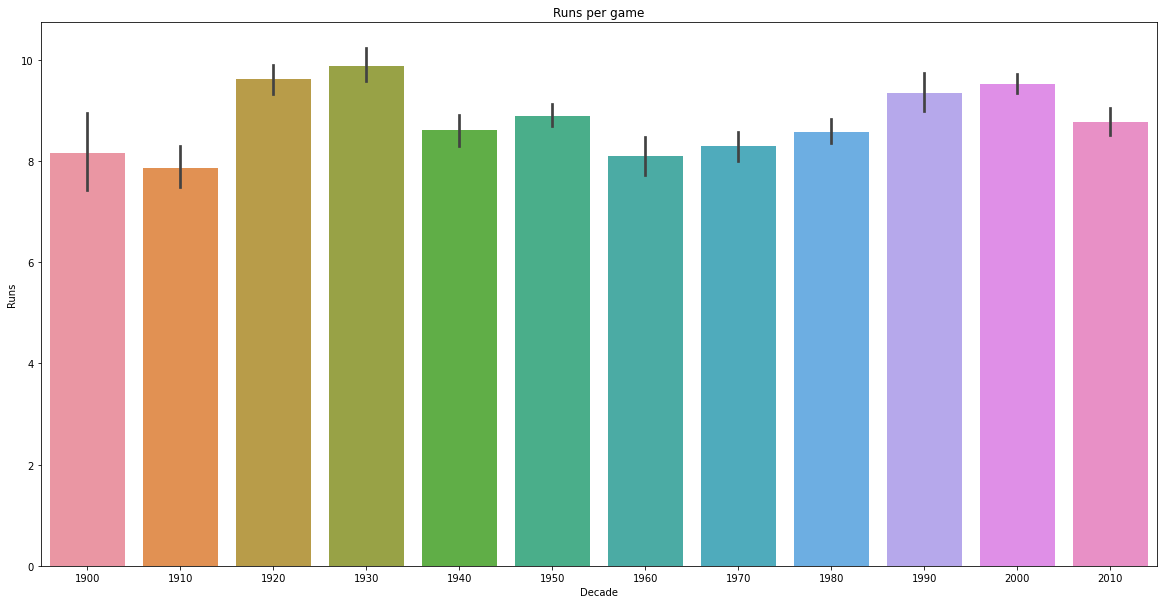

In [3]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'decade', y = 'R', data = pergame[(pergame['yearID'] >= 1900) & (pergame['yearID'] < 2020)])
ax.set_title('Runs per game')
ax.set_ylabel('Runs')
ax.set_xlabel('Decade')
ax

Over the past couple decades baseball's reputation has started to change. It has gotten labled recently as boring and too long and many blame the problem on declining offenseive play. The start of the 2021 season had offensive stats reaachng record lows not seen since the deadball era of baseball, around 1900 until Babe Ruths power emergence in 1919. For the first time in 50 years runs per game went down in the 2010's

<AxesSubplot:title={'center':'Normalized pitching rate stats'}, xlabel='Year', ylabel='Score'>

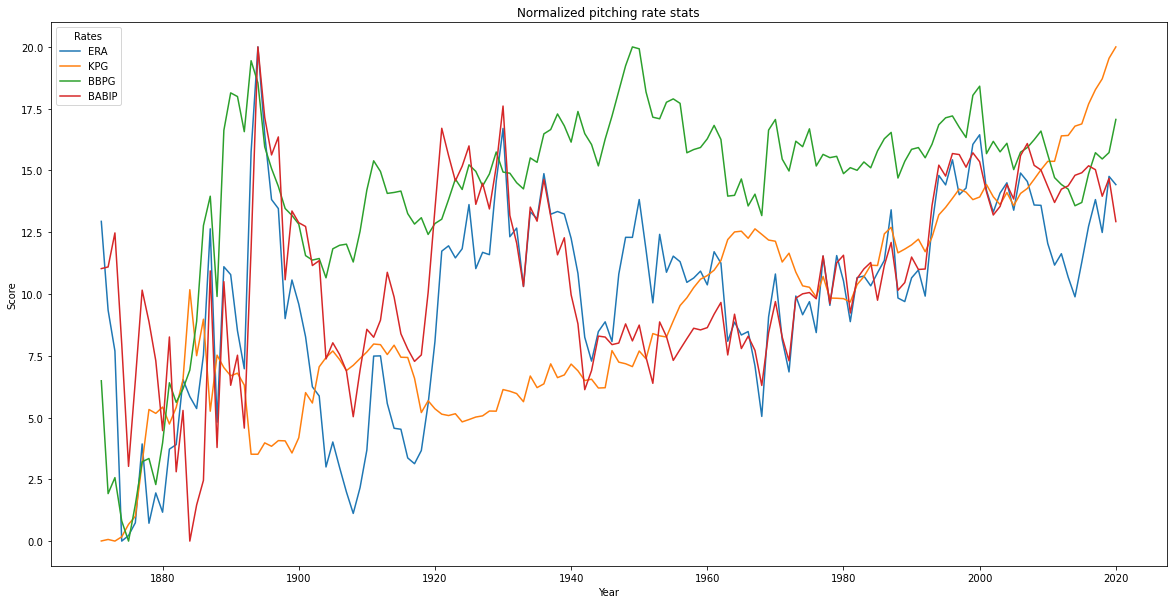

In [4]:
plt.figure(figsize = (20,10))
df = norm.melt(id_vars='yearID', value_vars = ['ERA', 'KPG', 'BBPG', 'BABIP'], var_name = 'Rates', value_name = 'vals')
ax = sns.lineplot(x = 'yearID', y = 'vals', hue = 'Rates', data = df)
ax.set_title('Normalized pitching rate stats')
ax.set_ylabel('Score')
ax.set_xlabel('Year')
ax

Comparing different pitching rate stats we can see that K/9 is skyrocketing. Surprisingly BABIP and ERA have also increased since the 80's and 90's which are viewed as strong offensive decades among baseball fans.

<AxesSubplot:xlabel='yearID', ylabel='vals'>

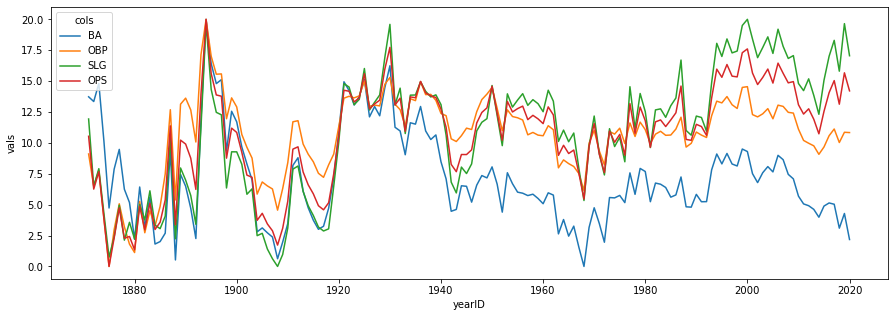

In [5]:
plt.figure(figsize = (15,5))
df = norm.melt(id_vars='yearID', value_vars = ['BA', 'OBP', 'SLG', 'OPS'], var_name = 'cols', value_name = 'vals')
sns.lineplot(x = 'yearID', y = 'vals', hue = 'cols', data = df)

Despite media reports of record offensive lows, the most important offensive statistics like OPS have been steadily increasing and are nearing record highs. Batting average on the other hand has been crashing towards the dead ball era lows. It appears that offense is not truely crashing, but batting average is.

<AxesSubplot:title={'center':'Balls in play per game'}, xlabel='Year', ylabel='BIP'>

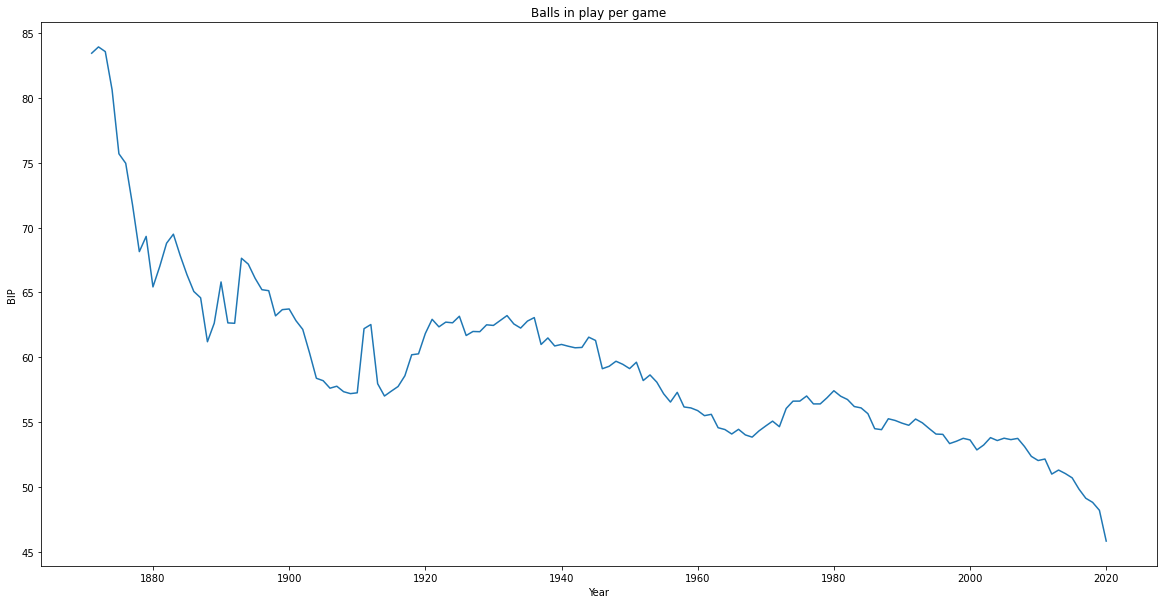

In [6]:
plt.figure(figsize = (20,10))
ax = sns.lineplot(data = pergame, x = 'yearID', y = 'BIP')
ax.set_title('Balls in play per game')
ax.set_ylabel('BIP')
ax.set_xlabel('Year')
ax

Balls in play have been steadily decreasing as "three true outcome" baseball becomes more popular. The three true outcomes are the 3 possibilities of a plate apearance that do not result in a fair ball being hit, a walk, a strikeout and a home run. 

Text(0.5, 0, 'Year')

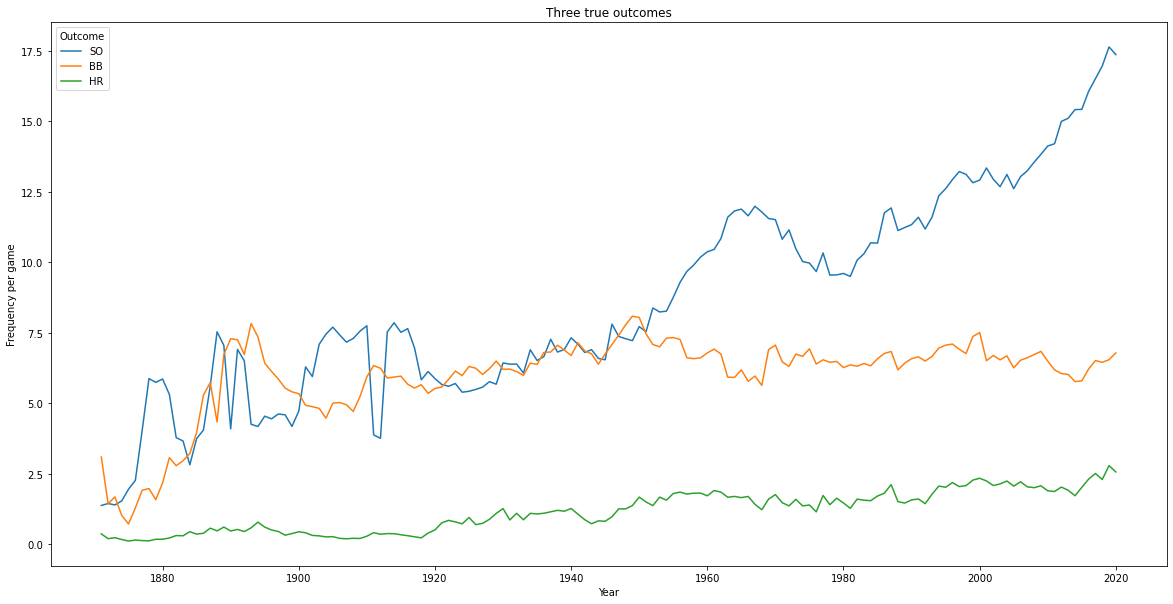

In [7]:
plt.figure(figsize = (20,10))
df = pergame.melt(id_vars='yearID', value_vars = ['SO', 'BB', 'HR'], var_name = 'Outcome', value_name = 'vals')
ax = sns.lineplot(x = 'yearID', y = 'vals', hue = 'Outcome', data = df)
ax.set_title('Three true outcomes')
ax.set_ylabel('Frequency per game')
ax.set_xlabel('Year')

Of the three true outcomes the largest gainer is strike outs. MLB in the middle of the 2021 season increased its enforcement of banning pitchers from applying a foreign substance to the ball in an effort to decrease strikeout rates. 

### Is baseball returning to the dead ball era?

Baseball is changing but it is not returning to the dead ball era like some people claim. The dead ball era was sparked when foul balls began to count for a strike. This rule, combined with less rules about how the ball could be altered and large ballpark sizes created an period of diminished offense. The key factors in the changes in recent years is the rise of data analytics in baseball and pitchers getting better faster than hitters can. Certain statistics that were once valued highly like batting average may continue to drop but more important offensive stats such as OBP and SLG will not drop without rule changes. This does not mean that baseball does not have a problem however. The rise of three true outcome baseball should be a concern, not because offensive production is greatly lowered but because it is not exciting. BIP are way down and teams are shifting to using pitchers with high swing and miss rates to counteract teams having hitters focus on three true outcomes. This combination means that until there are rule changes to change the ideal offensive strategy, three true outcome baseball will continue to rise. 

In [8]:
pergame.to_csv('../data/processed/pergame.csv')

In [9]:
norm.to_csv('../data/processed/normalized.csv')